In [3]:
import zipfile
zip_ref = zipfile.ZipFile('Multiple-Linear-Regression-master.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
import os
os.getcwd()

'C:\\Python new\\Linear Regression'

In [9]:
os.chdir('C:\\Python new\\Linear Regression\\Multiple-Linear-Regression-master\\')

In [10]:
# Importing the dataset
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, 4]

In [13]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [11]:
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [12]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [14]:
#Convert the column into categorical columns

states=pd.get_dummies(X['State'],drop_first=True)

In [16]:
states.head(1)

,Florida,New York
0,0,1


In [17]:
# Drop the state coulmn
X=X.drop('State',axis=1)

In [18]:
# concat the dummy variables
X=pd.concat([X,states],axis=1)

In [19]:
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [20]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [21]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(40, 5) (10, 5) (40,) (10,)


In [22]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [64]:
# Predicting the Test set results
y_pred_train=regressor.predict(X_train)
y_pred = regressor.predict(X_test)

In [65]:
from sklearn.metrics import r2_score
train_score=r2_score(y_train,y_pred_train)
test_score=r2_score(y_test,y_pred)

In [66]:
print(train_score,test_score)

0.9501847627493607 0.9347068473282423


(74381.39559591455, 199828.15183774385, 64647.57616180049, 190094.33240362979)

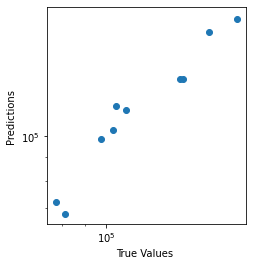

In [26]:
g=plt.scatter(y_test, y_pred)
g.axes.set_yscale('log')
g.axes.set_xscale('log')
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
g.axes.axis('equal')
g.axes.axis('square')

In [29]:
#g=plt.plot(y_test - y_pred,marker='o',linestyle='')

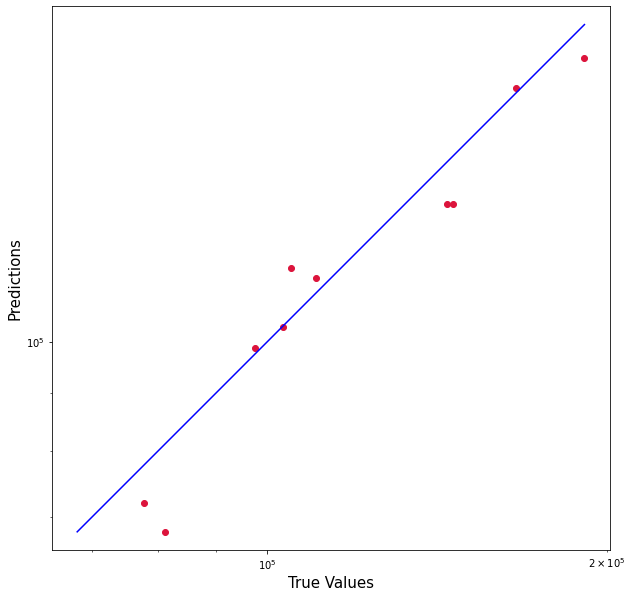

In [28]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [41]:
y_compare=pd.concat([pd.DataFrame(y_test).reset_index(),pd.DataFrame(y_pred).reset_index()],axis=1)

In [42]:
y_compare

,index,Profit,index,0
0,28,103282.38,0,103015.201598
1,11,144259.40,1,132582.277608
2,10,146121.95,2,132447.738452
3,41,77798.83,3,71976.098513
4,2,191050.39,4,178537.482211
5,27,105008.31,5,116161.242302
6,38,81229.06,6,67851.692097
7,31,97483.56,7,98791.733747
8,22,110352.25,8,113969.435330
9,4,166187.94,9,167921.065696


In [43]:
def mean_squared_error_custom(truth, predicted):
    m = truth.shape[0]
    mse = (np.sum((predicted - truth)**2)) / (2*m)
    return mse

In [44]:
print(mean_squared_error_custom(y_test, y_pred))

41751432.0162888


In [45]:
y_pred_train=regressor.predict(X_train)

In [46]:
print(mean_squared_error_custom(y_train, y_pred_train))

40785500.900386855


In [ ]:
# 3D digram for Linear Regression

In [67]:
import numpy as np
X= [[150,100],[159,200],[170,350],[175,400],[179,500],[180,180],[189,159],[199,110],[199,400],[199,230],[235,120],[239,340],[239,360],[249,145],[249,400]]
Y= [0.73,1.39,2.03,1.45,1.82,1.32,0.83,0.53,1.95,1.27,0.49,1.03,1.24,0.55,1.3]

In [68]:
import pandas as pd
df2=pd.DataFrame(X,columns=['Price','AdSpends'])
df2['Sales']=pd.Series(Y)
df2

,Price,AdSpends,Sales
0,150,100,0.73
1,159,200,1.39
2,170,350,2.03
3,175,400,1.45
4,179,500,1.82
5,180,180,1.32
6,189,159,0.83
7,199,110,0.53
8,199,400,1.95
9,199,230,1.27


In [69]:
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
model = smf.ols(formula='Sales ~ Price + AdSpends', data=df2)
results_formula = model.fit()
results_formula.params

Intercept    1.633842
Price       -0.006379
AdSpends     0.003161
dtype: float64

In [70]:
## Prepare the data for Visualization

x_surf, y_surf = np.meshgrid(np.linspace(df2.Price.min(), df2.Price.max(), 100),np.linspace(df2.AdSpends.min(), df2.AdSpends.max(), 100))
onlyX = pd.DataFrame({'Price': x_surf.ravel(), 'AdSpends': y_surf.ravel()})
fittedY=results_formula.predict(exog=onlyX)

In [71]:
## convert the predicted result in an array
fittedY=np.array(fittedY)

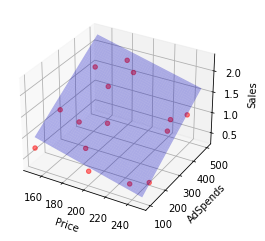

In [72]:
# Visualize the Data for Multiple Linear Regression

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2['Price'],df2['AdSpends'],df2['Sales'],c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='b', alpha=0.3)
ax.set_xlabel('Price')
ax.set_ylabel('AdSpends')
ax.set_zlabel('Sales')
plt.show()